In [1]:
import KNNclassy
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
importlib.reload(KNNclassy)

<module 'KNNclassy' from '/home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/KNNclassy.py'>

In [2]:
pathClassy = "/home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/"
pathData = "/home/miquelmiravet/University/Doctorat/Projects/IPAM_ML/KNN_miq/input/"

In [3]:
KNN = KNNclassy.ClassificationKNN()
KNN.load_original_dataset(pathData,"SLy/EMB/original_data_SLy_s300_f0d7.csv")
KNN.loadModel("optimal_models_final/", "knn_3cat_grid_eos_SLy")

File shape :  (196264, 11)
************************************************************
Loading data...
Nº of features:  5
Nº of events:  196264
Nº of events for training:  137385
Nº of events for testing:  58879
Datasets loaded!
************************************************************
loading  optimal_models_final/knn_3cat_grid_eos_SLy.joblib


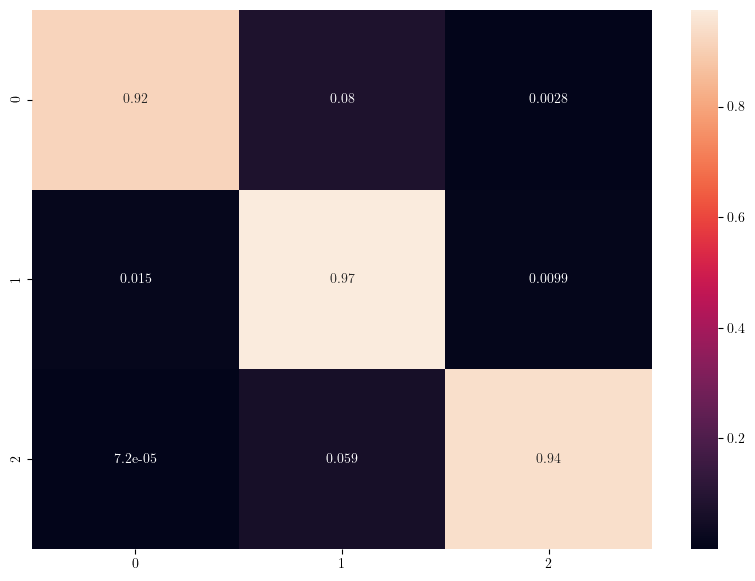

In [4]:
KNN.predict_model(KNN.xtest)
KNN.plot_confmatrix()

In [5]:
def generateMasses(algo,N):
    data=algo.xtest
    maxm1=np.max(data[:,0])
    minm1=np.min(data[:,0])
    maxm2=np.max(data[:,1])
    minm2=np.min(data[:,1])
    print("Trained with m1 in (",minm1,",",maxm1,")")
    print("Trained with m2 in (",minm2,",",maxm2,")")
    m1=np.linspace(start=minm1, stop=maxm1, num=N)
    m2=np.linspace(start=minm2, stop=maxm2, num=N)
    masses = []
    for i in range(0,N):
        for j in range(0,N):
            if(m1[i]>m2[j]):
                masses.append([m1[i],m2[j]])

    return masses

def generateMasses_limited(N):
    maxm1=50
    minm1=1
    maxm2=12
    minm2=1
    m1=np.linspace(start=minm1, stop=maxm1, num=N)
    m2=np.linspace(start=minm2, stop=maxm2, num=N)
    masses=[]
    for i in range(0,N):
        for j in range(0,N):
            if(m1[i]>m2[j]):
                masses.append([m1[i],m2[j]])

    return masses

        
def probLabelDensePlot(algo, masses, chi1, chi2, snr, label):
    N=len(masses)    
    Nfigures=len(chi1)
    
    f, (ax) = plt.subplots(Nfigures,1,figsize=(10, 3*Nfigures),constrained_layout=True)
    for i in range (0,Nfigures):
        X=[]
        m1=np.zeros(N)
        m2=np.zeros(N)
        for k in range(0,N):
            X.append([masses[k][0],masses[k][1],chi1[i],chi2[i],snr[i]])
            m1[k]=masses[k][0]
            m2[k]=masses[k][1]
        proba_dense   = algo.model.predict_proba(X)
        
        ax[i].tick_params(axis='y',labelsize=13)
        ax[i].tick_params(axis='x',labelsize=13)        
        
        if label == 'NS':
            proba_dense1d = proba_dense[:,1]+proba_dense[:,2]
            sc=ax[i].scatter(m1,m2, c=proba_dense1d, vmin=0, vmax=1, s=40, cmap='viridis')
            ax[i].set_yticks([1.0,3.0,10.0])
            ax[i].set_xticks([10.0,30.0,50.0])
            ax[i].axhline(y = 3, color = 'r', linestyle = '-')
            
        if label == 'REM':
            proba_dense1d = proba_dense[:,2]
            ax[i].set_xticks([2.83,10.0,30.0,50.0])
            ax[i].set_yticks([1.0,2.83,10.0])
            sc=ax[i].scatter(m1,m2, c=proba_dense1d, vmin=0, vmax=1, s=40, cmap='viridis')
            
        ax[i].set_title(r'$\chi^z_1$ = '+str(chi1[i])+', $\chi^z_2$ = '+str(chi2[i])+', SNR='+str(snr[i]),fontsize=18)
        if i==Nfigures-1:
            ax[i].set_xlabel(r"$m_1[M_\odot]$", fontsize=18)
        ax[i].set_xlim([1,50])
        ax[i].set_ylim([1,15])
        ax[i].set_ylabel(r"$m_2[M_\odot]$", fontsize=18)
    
    f.colorbar(sc, ax=ax, shrink=0.8)
    
    return

In [6]:
M=generateMasses_limited(200)

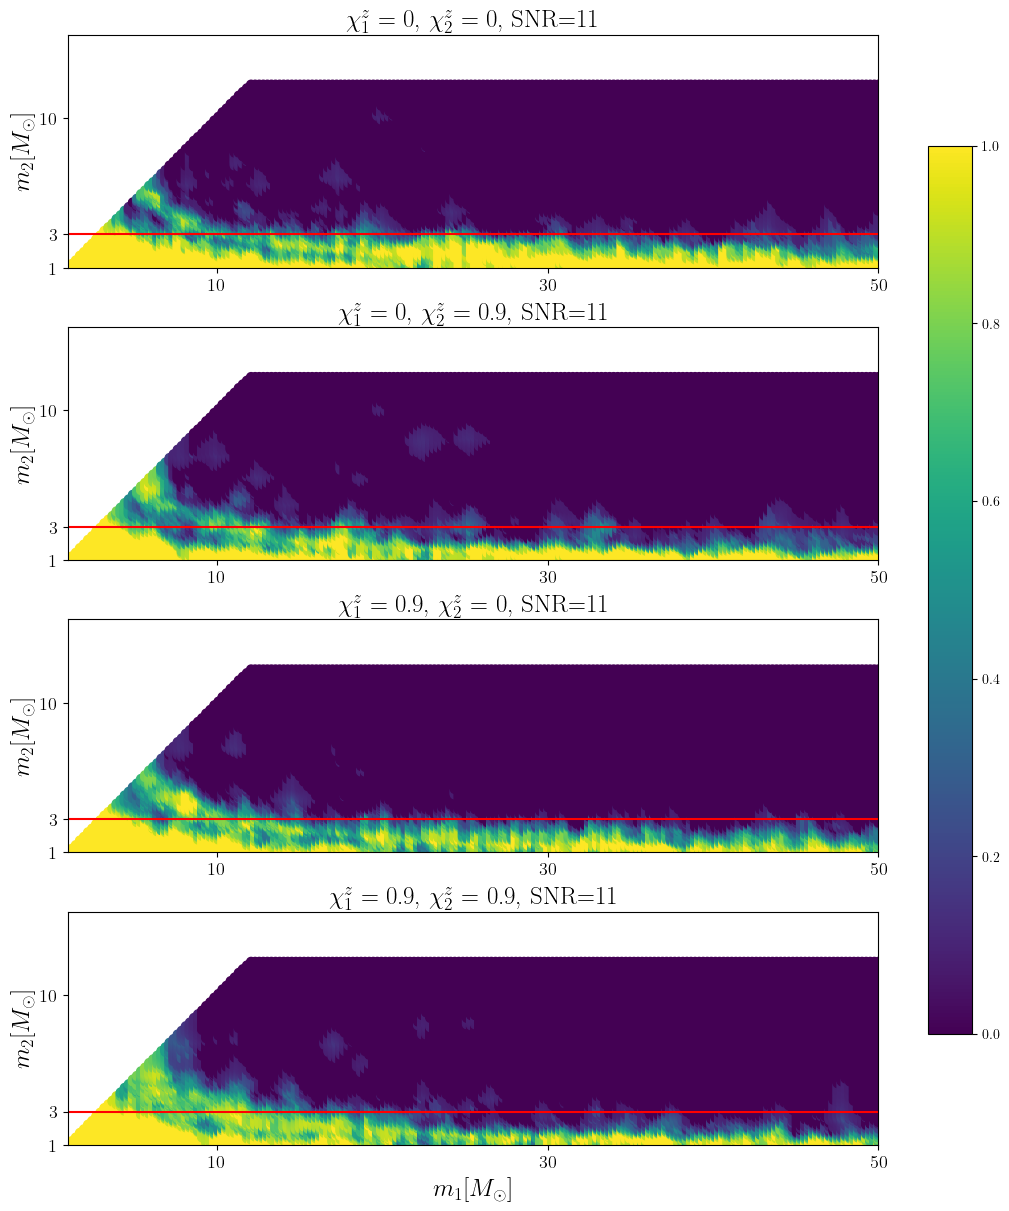

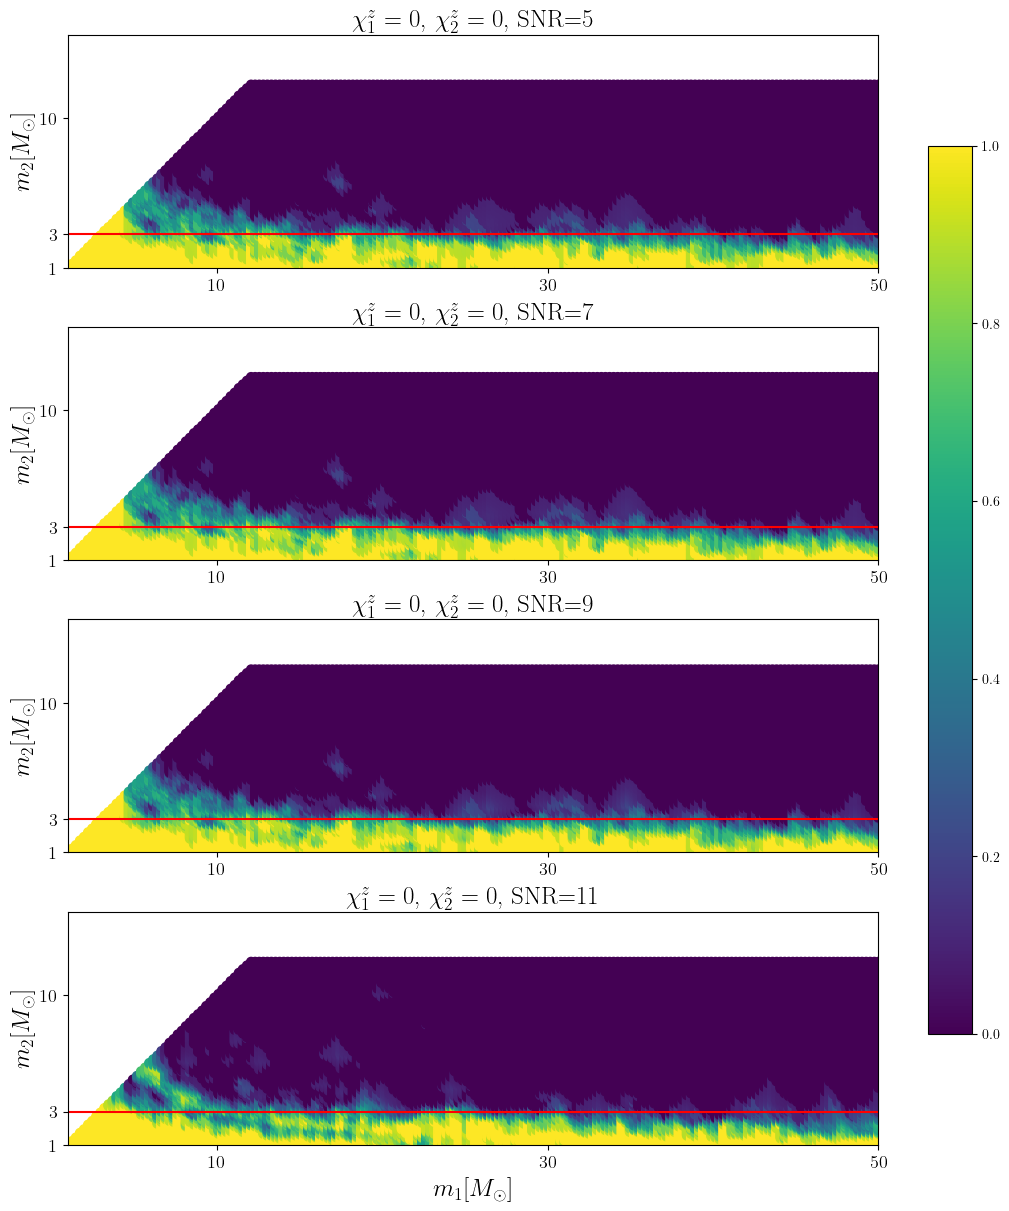

In [7]:
probLabelDensePlot(KNN,M,[0,0,0.9,0.9],[0,0.9,0,0.9],[11,11,11,11],'NS')
probLabelDensePlot(KNN,M,[0,0,0,0],[0,0,0,0],[5,7,9,11],'NS')

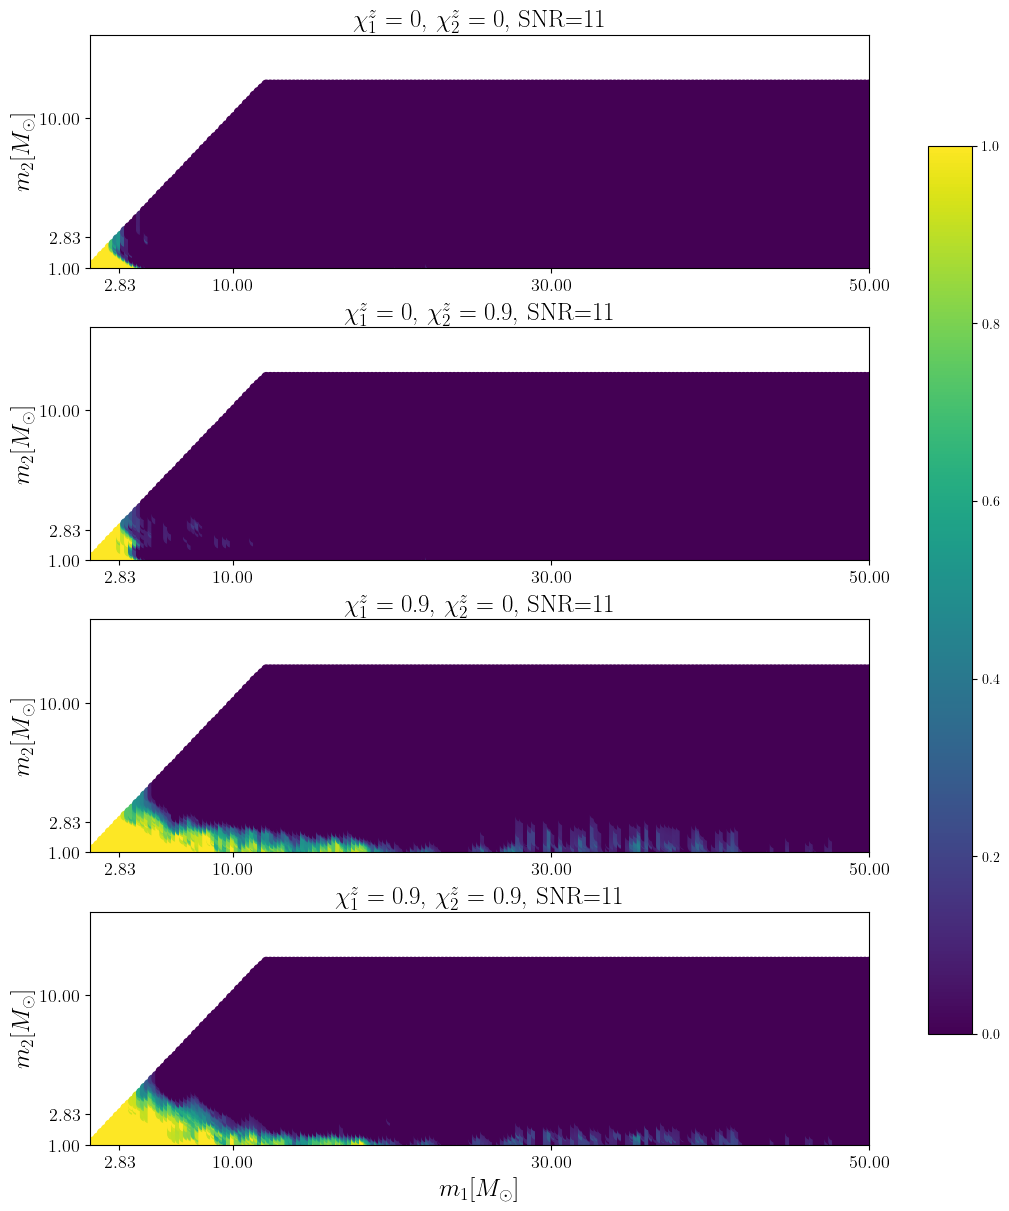

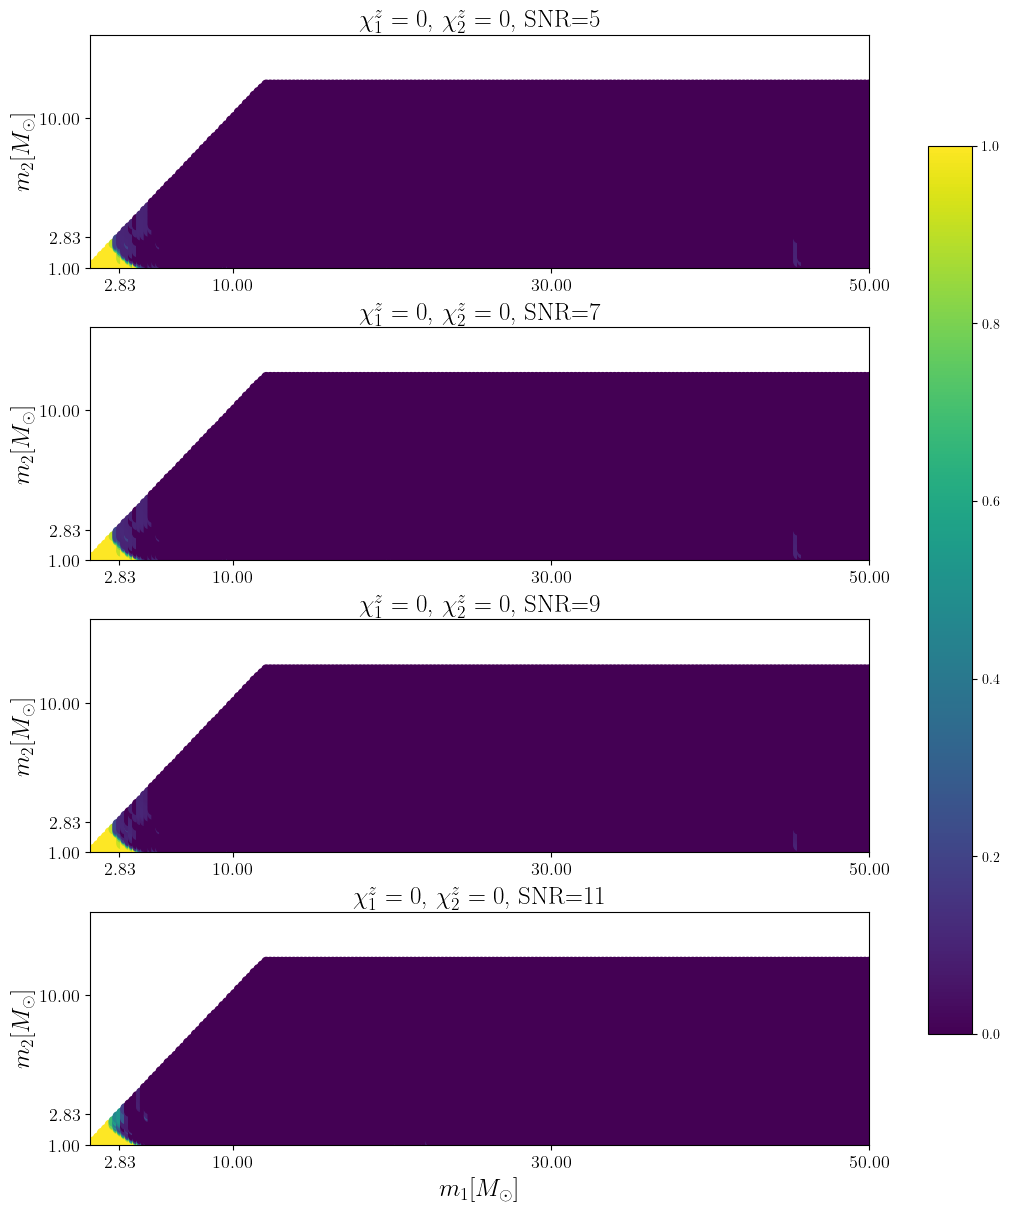

In [8]:
probLabelDensePlot(KNN,M,[0,0,0.9,0.9],[0,0.9,0,0.9],[11,11,11,11],'REM')
probLabelDensePlot(KNN,M,[0,0,0,0],[0,0,0,0],[5,7,9,11],'REM')